# 1. Data Preparation

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
n = 5000

In [ ]:
make_circles

<function sklearn.datasets._samples_generator.make_circles(n_samples=100, *, shuffle=True, noise=None, random_state=None, factor=0.8)>

returns:

- X : ndarray of shape (n_samples, 2)
- y : ndarray of shape (n_samples, ) - the integer labels (0 or 1) for class membership of each sample

In [ ]:
X, y = make_circles(n, noise=0.05, random_state=42)

In [ ]:
X

array([[-0.7119167 , -0.54660896],
       [ 0.79531672,  0.10020338],
       [ 0.75168064,  0.31084651],
       ...,
       [ 0.10344031,  0.88152119],
       [-0.74006297, -0.0185008 ],
       [-0.5933083 ,  0.85134228]])

In [ ]:
y

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,-0.711917,-0.546609,0
1,0.795317,0.100203,1
2,0.751681,0.310847,1
3,-0.892223,0.502352,0
4,-0.143615,0.938935,0
5,0.923024,0.256302,0
6,0.059593,0.913847,0
7,0.946938,-0.141954,0
8,1.036613,-0.131775,0
9,-0.692196,-0.743210,0


In [ ]:
circles.label.value_counts()

,count
label,
0,2500
1,2500


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X[:5]

array([[-0.7119167 , -0.54660896],
       [ 0.79531672,  0.10020338],
       [ 0.75168064,  0.31084651],
       [-0.89222324,  0.50235231],
       [-0.14361469,  0.93893486]])

In [ ]:
X[:, 0]

array([-0.7119167 ,  0.79531672,  0.75168064, ...,  0.10344031,
       -0.74006297, -0.5933083 ])

In [ ]:
X[:, 1]

array([-0.54660896,  0.10020338,  0.31084651, ...,  0.88152119,
       -0.0185008 ,  0.85134228])

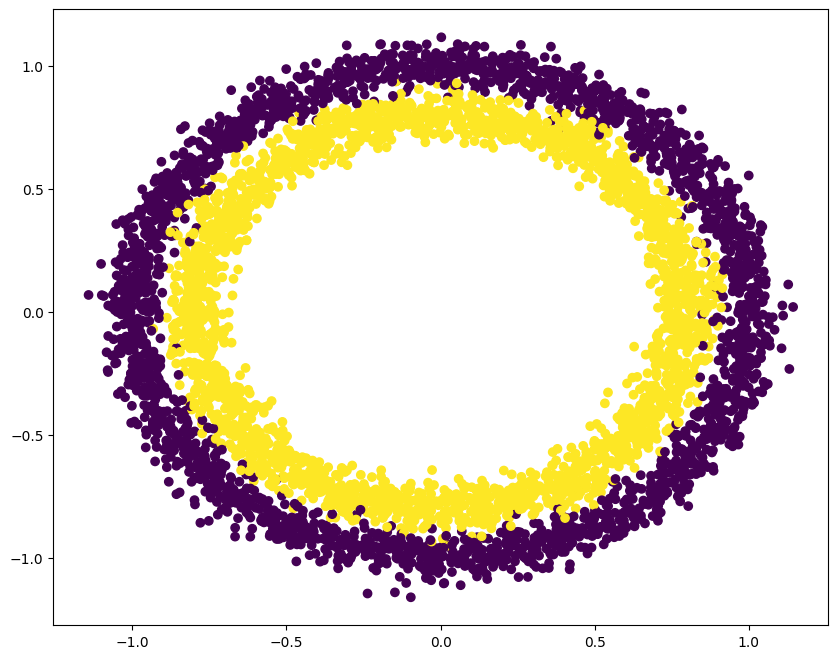

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [-0.7119167  -0.54660896] and the same for y: 0
Shapes for one sample of X: (2,) and the same for y: ()


In [ ]:
X.shape, y.shape

((5000, 2), (5000,))

We have two inputs for one output

turn the data into tensors (right now in numpy arrays)

In [ ]:
import torch

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X

tensor([[-0.7119, -0.5466],
        [ 0.7953,  0.1002],
        [ 0.7517,  0.3108],
        ...,
        [ 0.1034,  0.8815],
        [-0.7401, -0.0185],
        [-0.5933,  0.8513]])

In [ ]:
y

tensor([0., 1., 1.,  ..., 1., 1., 0.])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(3500, 1500, 3500, 1500)

In [ ]:
len(X)

5000

In [ ]:
0.3 * len(X)

1500.0

# 2. Building a model

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [ ]:
class ClassifyCirclesModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = torch.nn.Linear(in_features=2, out_features=5) # this would take in 2 features and output 5 features
    self.layer2 = torch.nn.Linear(in_features=5, out_features=1) # takes in 5 features (from previous layer) and then produces 1 feature

  def forward(self, x):
    return self.layer2(self.layer1(x))

In [ ]:
model0 = ClassifyCirclesModel().to(device)

model0

ClassifyCirclesModel(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
not_trained_preds = model0(X_test)

RuntimeError: Expected all tensors to be on the same device, but got mat1 is on cpu, different from other tensors on cuda:0 (when checking argument in method wrapper_CUDA_addmm)

In [ ]:
not_trained_preds = model0(X_test.to(device))

In [ ]:
not_trained_preds.shape

torch.Size([1500, 1])

In [ ]:
print(f"First 5 predictions (without training on data):\n", not_trained_preds[:10])

First 5 predictions (without training on data):
 tensor([[ 0.6796],
        [ 0.5265],
        [-0.1639],
        [ 0.0594],
        [ 0.5949],
        [-0.4135],
        [ 0.6138],
        [-0.1777],
        [ 0.7288],
        [ 0.1596]], device='cuda:0', grad_fn=<SliceBackward0>)


In [ ]:
print(f"First 5 actual data:\n", y_test[:10])

First 5 actual data:
 tensor([0., 0., 0., 1., 1., 0., 1., 1., 0., 1.])


More on loss function: [A Quick Guide to Pytorch Loss Functions](https://www.askpython.com/python/examples/pytorch-loss-functions)

In [ ]:
# defining an accuracy function : to check how many correct predictions we make

def accuracy_fn(y_true, y_preds):
  right = torch.eq(y_true, y_preds).sum().item()
  accuracy = (right / len(y_preds)) * 100

  return accuracy

# 3. Training the model

In [ ]:
y_logits = model0(X_test.to(device))

In [ ]:
y_logits

tensor([[ 0.6796],
        [ 0.5265],
        [-0.1639],
        ...,
        [ 0.2699],
        [ 0.5588],
        [ 0.2800]], device='cuda:0', grad_fn=<AddmmBackward0>)

outputs are random -> as model is not trained

raw outputs of model is often referred to as logits : https://datascience.stackexchange.com/questions/31041/what-does-logits-in-machine-learning-mean/31045

In [ ]:
torch.sigmoid(y_logits)

tensor([[0.6637],
        [0.6287],
        [0.4591],
        ...,
        [0.5671],
        [0.6362],
        [0.5695]], device='cuda:0', grad_fn=<SigmoidBackward0>)

Sigmoid is a mathematical function that maps any real-valued number into a value between 0 and 1 -> outputs are now in the form of prediction probabilities

in our problem, we're expecting outputs as 0 or 1
- the probability closer to 0 means the model thinks its 0
- and vice versa for 1

<hr>

- `torch.sigmoid(y_logits)` >= 0.5, y=1 (class 1)
- `torch.sigmoid(y_logits)` < 0.5, y=0 (class 0)

In [ ]:
y_preds = torch.round(torch.sigmoid(y_logits))

In [ ]:
y_preds

tensor([[1.],
        [1.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [ ]:
torch.eq(y_preds, y_test)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

check their devices

In [ ]:
y_preds.device, y_test.device

(device(type='cuda', index=0), device(type='cpu'))

as the model was converted to device, the predictions also would be in same device, so we must convert

In [ ]:
torch.eq(y_preds, y_test.to(device))

tensor([[False, False, False,  ..., False,  True, False],
        [False, False, False,  ..., False,  True, False],
        [ True,  True,  True,  ...,  True, False,  True],
        ...,
        [False, False, False,  ..., False,  True, False],
        [False, False, False,  ..., False,  True, False],
        [False, False, False,  ..., False,  True, False]], device='cuda:0')

In [ ]:
y_preds

tensor([[1.],
        [1.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [ ]:
y_test

tensor([0., 0., 0.,  ..., 0., 1., 0.])

In [ ]:
y_preds.shape, y_test.shape

(torch.Size([1500, 1]), torch.Size([1500]))

In [ ]:
y_preds.squeeze().shape

torch.Size([1500])

In [ ]:
torch.eq(y_preds.squeeze(), y_test.to(device))

tensor([False, False,  True,  ..., False,  True, False], device='cuda:0')

shape problems

In [ ]:
accuracy_fn(y_test.to(device), y_preds)

75261.33333333333

In [ ]:
y_preds.shape, y_test.shape

(torch.Size([1500, 1]), torch.Size([1500]))

In [ ]:
accuracy_fn(y_test.to(device), y_preds.squeeze())

52.800000000000004

## Training and Testing loop

In [ ]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)

epochs = 200

train_losses, test_losses = [], []
train_accs, test_accs = [], []

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model0.train()

  y_logits = model0(X_train).squeeze()
  y_pred_probs = torch.sigmoid(y_logits)
  y_preds = torch.round(y_pred_probs)

  # loss = loss_fn(y_preds, y_train) -> if we used torch.nn.BCELoss() -> we'll need torch.sigmoid()
  loss = loss_fn(y_logits, y_train) # torch.nn.BCEWithLogitsLoss has a sigmoid layer, so works with raw logits
  accuracy = accuracy_fn(y_train, y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  # testing
  model0.eval()
  with torch.inference_mode():
    test_logits = model0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test) # as we have BCEWithLogitsLoss, we'll use test_logits
    test_acc = accuracy_fn(y_test, test_preds)


  train_losses.append(loss.item())
  test_losses.append(test_loss.item())
  train_accs.append(accuracy)
  test_accs.append(test_acc)

  if (epoch + 1) % 10 == 0:
    print(f"Epoch: {epoch + 1}\t Training loss: {loss}\t Train accuracy: {accuracy}\t Test loss: {test_loss}\t Test accuracy: {test_acc}%")

Epoch: 10	 Training loss: 0.7024571895599365	 Train accuracy: 50.4	 Test loss: 0.6985255479812622	 Test accuracy: 52.06666666666667%
Epoch: 20	 Training loss: 0.7021218538284302	 Train accuracy: 50.34285714285714	 Test loss: 0.698276698589325	 Test accuracy: 52.06666666666667%
Epoch: 30	 Training loss: 0.701799213886261	 Train accuracy: 50.31428571428571	 Test loss: 0.6980387568473816	 Test accuracy: 52.0%
Epoch: 40	 Training loss: 0.7014889121055603	 Train accuracy: 50.2	 Test loss: 0.69781094789505	 Test accuracy: 52.06666666666667%
Epoch: 50	 Training loss: 0.7011902928352356	 Train accuracy: 50.28571428571429	 Test loss: 0.6975929141044617	 Test accuracy: 52.06666666666667%
Epoch: 60	 Training loss: 0.7009028196334839	 Train accuracy: 50.34285714285714	 Test loss: 0.6973844170570374	 Test accuracy: 52.0%
Epoch: 70	 Training loss: 0.7006261348724365	 Train accuracy: 50.31428571428571	 Test loss: 0.6971848011016846	 Test accuracy: 51.93333333333333%
Epoch: 80	 Training loss: 0.700359

### Training and Test Loss and Accuracy Visualization

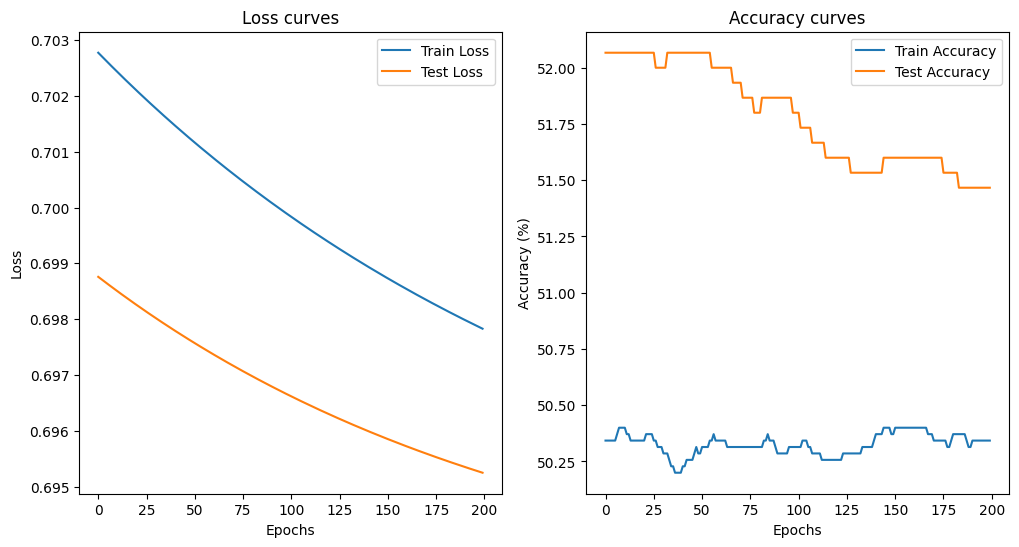

In [ ]:
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(test_accs, label='Test Accuracy')
plt.title('Accuracy curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

### Decision Boundary Visualization

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  # Put everything to CPU
  model.to("cpu")
  X, y = X.to("cpu"), y.to("cpu")

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

  model.eval()
  with torch.inference_mode():
    y_pred = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()).squeeze()

  y_pred = torch.round(torch.sigmoid(y_pred))

  y_pred = y_pred.reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlGn, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlGn)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

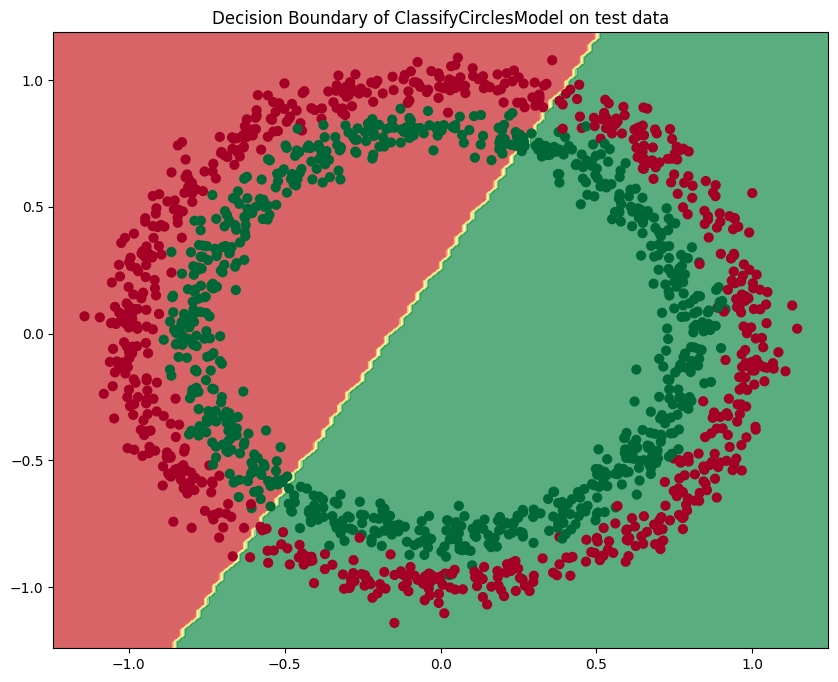

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Decision Boundary of ClassifyCirclesModel on test data")
plot_decision_boundary(model0, X_test, y_test)

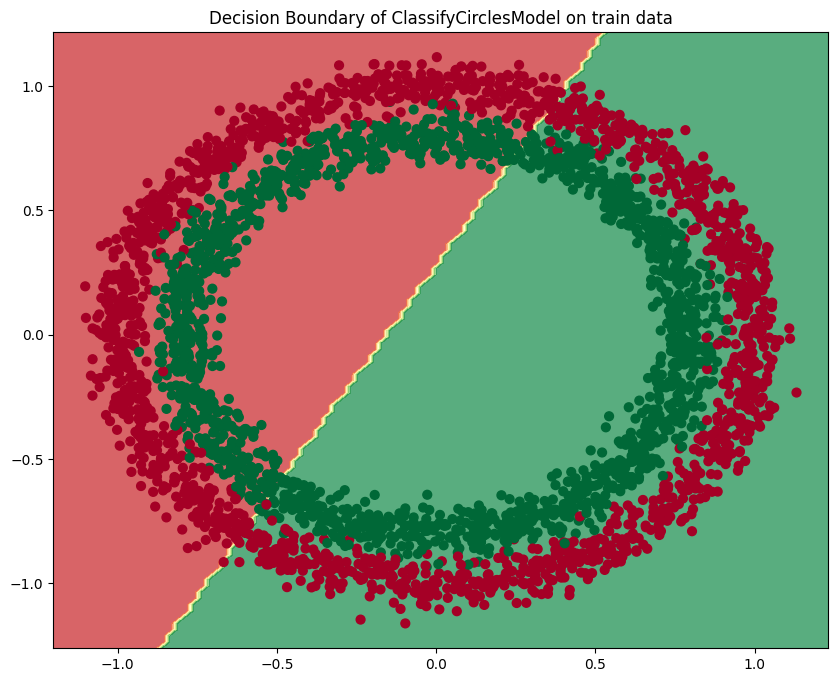

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Decision Boundary of ClassifyCirclesModel on train data")
plot_decision_boundary(model0, X_train, y_train)

# 4. Improving our model : introducing non linearity

In [ ]:
n_samples = 1000

X, y = make_circles(n_samples=n_samples,
    noise=0.03,
    random_state=42,
)

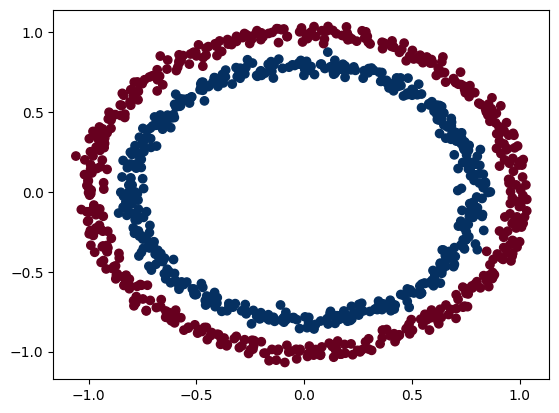

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42
)

X_train[:5], y_train[:5]

(tensor([[-0.9342, -0.2457],
         [-0.9256,  0.3373],
         [ 0.9073,  0.1618],
         [ 0.9844, -0.2257],
         [-1.0015, -0.1795]]),
 tensor([0., 0., 0., 0., 0.]))

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([700, 2]),
 torch.Size([300, 2]),
 torch.Size([700]),
 torch.Size([300]))

In [ ]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model1 = CircleModelV2().to(device)
print(model1)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

train_losses = []
test_losses = []
train_accs = []
test_accs = []

for epoch in range(epochs):
  y_logits = model1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_preds=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model1.eval()
  with torch.inference_mode():
    test_logits = model1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_preds=test_pred)


  train_losses.append(loss)
  test_losses.append(test_loss)
  train_accs.append(acc)
  test_accs.append(test_acc)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69271, Accuracy: 50.86% | Test Loss: 0.69349, Test Accuracy: 48.00%
Epoch: 100 | Loss: 0.69103, Accuracy: 51.00% | Test Loss: 0.69184, Test Accuracy: 48.00%
Epoch: 200 | Loss: 0.68960, Accuracy: 70.71% | Test Loss: 0.69030, Test Accuracy: 69.33%
Epoch: 300 | Loss: 0.68769, Accuracy: 68.71% | Test Loss: 0.68826, Test Accuracy: 68.33%
Epoch: 400 | Loss: 0.68474, Accuracy: 63.14% | Test Loss: 0.68533, Test Accuracy: 64.33%
Epoch: 500 | Loss: 0.68014, Accuracy: 58.86% | Test Loss: 0.68088, Test Accuracy: 59.67%
Epoch: 600 | Loss: 0.67356, Accuracy: 61.29% | Test Loss: 0.67476, Test Accuracy: 62.33%
Epoch: 700 | Loss: 0.66315, Accuracy: 68.29% | Test Loss: 0.66524, Test Accuracy: 67.33%
Epoch: 800 | Loss: 0.64656, Accuracy: 71.14% | Test Loss: 0.65004, Test Accuracy: 72.67%
Epoch: 900 | Loss: 0.61569, Accuracy: 78.00% | Test Loss: 0.62106, Test Accuracy: 76.33%


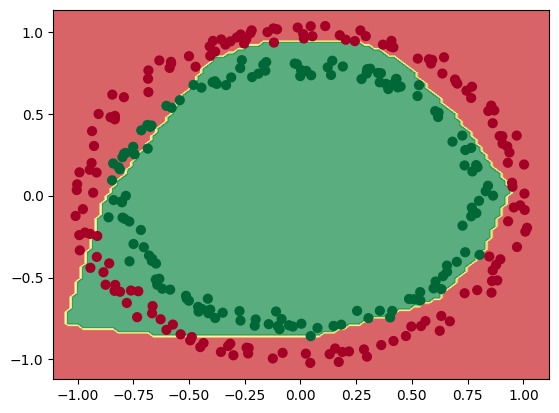

In [ ]:
plot_decision_boundary(model1, X_test, y_test)

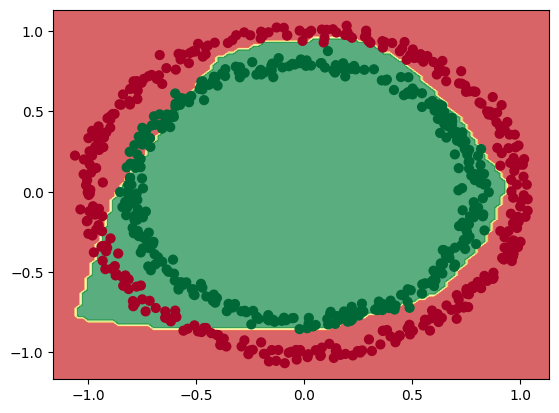

In [ ]:
plot_decision_boundary(model1, X_train, y_train)